# Datetime in Python

This intro to handling *dates* and *times* in Python is based on the documentation of the standard library's `datetime` module https://docs.python.org/3.6/library/datetime.html.

The datetime module supplies classes for manipulating *dates* and *times* in both simple and complex ways. While date and time arithmetic is supported, the focus of the implementation is on efficient attribute extraction for output formatting and manipulation.

## Date Objects

A date object represents a date (year, month and day) in an idealized calendar, the current Gregorian calendar indefinitely extended in both directions. January 1 of year 1 is called day number 1, January 2 of year 1 is called day number 2, and so on. This matches the definition of the "proleptic Gregorian" calendar in Dershowitz and Reingold’s book Calendrical Calculations, where it is the base calendar for all computations. See the book for algorithms for converting between proleptic Gregorian ordinals and many other calendar systems. Alternatively, you can have a look at the paper describing what is extended in the book:
http://www.cs.tau.ac.il/~nachumd/papers/cc-paper.pdf

In [ ]:
from datetime import date


today = date.today()
today

In [ ]:
today = date(today.year, 3, 2)
today

In [ ]:
next_lecture = date(today.year, 3, 7)
time_to_next_lecture = abs(next_lecture - today)
time_to_next_lecture.days

In [ ]:
today.strftime("%d/%m/%Y")

In [ ]:
today.strftime("%A %d. %B %Y")

## Time Objects

A time object represents a (local) time of day, independent of any particular day. In our coure I will not consider times with respect to different time zones. In case you need to add information about which time zone a `time` refers, please read https://docs.python.org/3.4/library/datetime.html#tzinfo-objects.

In [ ]:
from datetime import datetime, date, time


t = time(12, 10, 30)
t.isoformat()

In [ ]:
print(t.strftime('%H:%M:%S'))

print('The {} is {:%H:%M}.'.format("time", t))

## Datetime Objects

In [ ]:
from datetime import datetime, date, time


d = date.today()
t = time(12, 30)
datetime.combine(d, t)

In [ ]:
now = datetime.now()
now

In [ ]:
datetime.utcnow()

In [75]:
ic = now.isocalendar()
week_number = ic[1]
week_number

9

In [ ]:
now.strftime("%A, %d. %B %Y %I:%M%p")

In [ ]:
'The {1} is {0:%d}, the {2} is {0:%B}, the {3} is {0:%I:%M%p}.'.format(now, "day", "month", "time")

In [ ]:
d = datetime.strptime('10 Jun 2010', '%d %b %Y')
print(d)
d.strftime('%d-%m-%Y week: %U')

## Timedeltas

A `timedelta` object represents a duration, the difference between two dates or times.

In [ ]:
from datetime import timedelta


d = timedelta(microseconds=5)
(d.days, d.seconds, d.microseconds)

In [ ]:
timedelta(hours=-5)

### Operations with `timedelta`s

In [ ]:
year_as_delta = timedelta(days=365)
another_year_delta = timedelta(weeks=40, days=84, hours=23, minutes=50, seconds=600)  # adds up to 365 days

last_year = datetime.now() - year_as_delta
next_year = datetime.now() - year_as_delta + (2 *another_year_delta)
print(last_year)
print(next_year)

two_year_delta = next_year - last_year
print('The two year difference is equivalent to {} days and {} seconds'.format(
    two_year_delta.days, two_year_delta.total_seconds()))


## Converting Strings to Times and Vice Versa

In [ ]:
from datetime import datetime


datetime.now().isoformat()

In [ ]:
dt = datetime.strptime('21/11/06 16:30', '%d/%m/%y %H:%M')
dt

In [ ]:
dt.strftime('%y-%m-%d %H:%M')

### Parsing Arbitrary Dates from Strings

The `dateutil.parser` module offers a generic date/time string parser which is able to parse most known formats to represent a date and/or time.

The module attempts to be forgiving with regards to unlikely input formats, returning a datetime object even for dates which are ambiguous.

In [ ]:
import dateutil.parser


dateutil.parser.parse('21/11-06 16:30')

# Pandas for Time Series and Data Frames

Pandas is -similar to NumPy- another library offering high-level data structures, which enable fast data analyzis. For us, the most important are probably the types `Series` and `DataFrame`, both of which are introduced in the following.  

This tutorial is based on the intro to Pandas: http://pandas.pydata.org/pandas-docs/stable/10min.html


In [ ]:
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

As we will refer to Panda's classes and functions often in code, we usually import the module as `pd`.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## `Series`

A `Series` is a one-dimensional labeled array capable of holding any data type (integers, strings, floating point numbers, Python objects, etc.). The axis labels are collectively referred to as the index.

http://pandas.pydata.org/pandas-docs/stable/dsintro.html#series

You can creating a Series by passing a list of values, letting Pandas create a default integer index.

In [ ]:
s = pd.Series([1, 3, 5, np.nan, 6, 8])
s

For the following example introducing `Series` we will collect some open data from the World Bank, see http://data.worldbank.org/?locations=DK-UY. The this dataset includes a plethora of interesting data. However, for this example we will focus on the *CO2 emissions (metric tons per capita)*.

First, we have to download the data. We do this by writing the response to a request to the World Bank API into a file. As denoted in the response header, we receive a ZIP file.

In [ ]:
import requests


url = 'http://api.worldbank.org/v2/en/country/DNK;URY'

response = requests.get(url, params={'downloadformat': 'csv'})
print(response.headers)

fname = response.headers['Content-Disposition'].split('=')[1]

if response.ok:  # status_code == 200:
    with open(fname, 'wb') as f:
        f.write(response.content)   

print('Downloaded {}'.format(fname))

In [81]:
%%bash
ls -ltrh | tail

-rw-r--r--  1 rhp  staff   609B Feb 28 09:48 commander_keen_sprite_run.gif
-rw-r--r--  1 rhp  staff   169B Feb 28 10:43 api_keys.py
drwxr-xr-x  6 rhp  staff   204B Feb 28 10:43 __pycache__
-rw-r--r--  1 rhp  staff    48K Feb 28 10:56 weather_forecast.html
-rw-r--r--@ 1 rhp  staff   1.3M Feb 28 10:56 15-Plotting Continued - Bokeh.ipynb
-rw-r--r--  1 rhp  staff    72B Feb 28 13:35 Untitled4.ipynb
-rw-r--r--  1 rhp  staff   6.9K Feb 28 15:17 Untitled1.ipynb
-rw-r--r--  1 rhp  staff   216K Feb 28 15:32 16-Intro to Numpy.ipynb
-rw-r--r--  1 rhp  staff    31K Mar  2 09:46 17-Intro to Pandas.ipynb
-rw-r--r--  1 rhp  staff   9.6K Mar  2 09:46 Untitled5.ipynb


You can resort to the standard libraries `zipfile` module to uncompress the downloaded file.

In [ ]:
import zipfile


zipfile.ZipFile(fname, 'r').extractall('.')

In [ ]:
%%bash

ls -ltrh | tail

Additionally, you can make use of the `glob` module to glob for certain file patterns. We will store the filename of the CSV file we are interested in, in a variable called `local_file`.

In [85]:
from glob import glob


local_file = glob('./API_Download*.csv')[0]
local_file

'./API_Download_DS2_en_csv_v2_5623297.csv'

## A small detour...

### Collecting information on the CLI

To see the header of the file that is of our interest, we can use the `head` command.

In [ ]:
%%bash
head ./API_Download_*.csv

We can see that the actual CSV header is on line five. To extract only the header row, we can use the stream editor *sed*, see `man sed`. The argument `'5!d'` tells `sed`, that we are only interested in the fifth line.

In [ ]:
%%bash
sed '5!d' API_Download_DS2_en_csv_v2_5606733.csv

To get the two lines -one for Denmark and one for Uruguay repectively- holding the CO2 emission in tons, we can use the grep command, see `man grep`.

In [ ]:
%%bash
grep 'CO2 emissions (metric tons per capita)' API_Download_DS2_en_csv_v2_5606733.csv

### Executing OS Commands from Python


With the help of the `subprocess` module allows us to execute shell commands and to read what the process was writing to standard out and standard error.


In [86]:
import subprocess


cmd = 'sed 5!d {}'.format(local_file).split()
out, err = subprocess.Popen(cmd, stdout=subprocess.PIPE, 
                            stderr=subprocess.STDOUT).communicate()
# Since we are getting the output as a byte literal, we have to decode it into string
header_cols = out.splitlines()[0].decode('UTF-8').split(',')
header_cols = [h.replace('"', '') for h in header_cols]
header_cols

['Country Name',
 'Country Code',
 'Indicator Name',
 'Indicator Code',
 '1960',
 '1961',
 '1962',
 '1963',
 '1964',
 '1965',
 '1966',
 '1967',
 '1968',
 '1969',
 '1970',
 '1971',
 '1972',
 '1973',
 '1974',
 '1975',
 '1976',
 '1977',
 '1978',
 '1979',
 '1980',
 '1981',
 '1982',
 '1983',
 '1984',
 '1985',
 '1986',
 '1987',
 '1988',
 '1989',
 '1990',
 '1991',
 '1992',
 '1993',
 '1994',
 '1995',
 '1996',
 '1997',
 '1998',
 '1999',
 '2000',
 '2001',
 '2002',
 '2003',
 '2004',
 '2005',
 '2006',
 '2007',
 '2008',
 '2009',
 '2010',
 '2011',
 '2012',
 '2013',
 '2014',
 '2015',
 '2016',
 '2017',
 '']

In [84]:
%%bash
ls -ltr API_Download_DS2_en_csv_v2_5623297.csv

-rw-r--r--  1 rhp  staff  1706921 Mar  2 09:54 API_Download_DS2_en_csv_v2_5623297.csv


Now, let's get in a similar way the line of the CSV file containing the time series corresponding to Danmark's and Uruguay's CO2 emissions per person.

In [87]:
import subprocess


cmd = ['grep', 'CO2 emissions (metric tons per capita)', local_file]
out, err = subprocess.Popen(cmd, stdout=subprocess.PIPE, 
                            stderr=subprocess.STDOUT).communicate()
lines = out.decode('UTF-8').splitlines()
lines = [l.split(',') for l in lines]
lines = [[c.replace('"', '') for c in l] for l in lines]
lines

[['Denmark',
  'DNK',
  'CO2 emissions (metric tons per capita)',
  'EN.ATM.CO2E.PC',
  '6.50268309283578',
  '6.88126015490644',
  '7.9451073610821',
  '8.68983130048716',
  '9.14639293937068',
  '9.31657600359066',
  '10.4490116586529',
  '10.1493005475918',
  '10.9613147942099',
  '12.1429748602781',
  '12.5996564651087',
  '11.4972271507917',
  '11.9488346011977',
  '11.801611792919',
  '10.9167686263068',
  '11.0237664584528',
  '11.8549028939028',
  '12.1545851471744',
  '11.9739262277225',
  '12.3121966244144',
  '11.7840138262008',
  '10.1119423880012',
  '10.491964531704',
  '9.81084223305764',
  '9.9501332161102',
  '11.7474430895414',
  '11.5032965311821',
  '11.3793050315349',
  '10.7432506302739',
  '9.5050900188092',
  '9.77069869920651',
  '11.6933114849006',
  '10.5045544990979',
  '10.9982550300388',
  '11.7169488953513',
  '10.9245408267288',
  '13.7146519315518',
  '11.6476885201886',
  '11.2273041516574',
  '10.3626636406223',
  '9.61317555419716',
  '9.875092348393

As in Pandas `Series` are one-dimensional labeled arrays, we are now ready to go to create two time series of CO2 emissions for Danmark and Uruguay repectively.
 

In [88]:
print(header_cols)
print(lines)

['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code', '1960', '1961', '1962', '1963', '1964', '1965', '1966', '1967', '1968', '1969', '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977', '1978', '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986', '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995', '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '']
[['Denmark', 'DNK', 'CO2 emissions (metric tons per capita)', 'EN.ATM.CO2E.PC', '6.50268309283578', '6.88126015490644', '7.9451073610821', '8.68983130048716', '9.14639293937068', '9.31657600359066', '10.4490116586529', '10.1493005475918', '10.9613147942099', '12.1429748602781', '12.5996564651087', '11.4972271507917', '11.9488346011977', '11.801611792919', '10.9167686263068', '11.0237664584528', '11.8549028939028', '12.1545851471744', '11.9739262277225', '12.3

Since our data and the corresponding indexes are still all strings we have to convert them to floats and integers repectively. We do so using two different mechanisms. Once, creation of typed NumPy arrays and on the other hand via a Pandas method `convert_objects`, which converts strings to numerical values of a suitable type.

In [93]:
header_cols[4:-1]
lines[0][4:-1]

ts_dk = pd.Series(lines[0][4:-1], index=np.asarray(header_cols[4:-1], dtype=int))
ts_dk
ts_dk = pd.to_numeric(ts_dk)
ts_dk.loc[1960]

6.5026830928357802

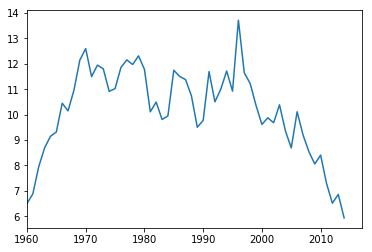

In [94]:
ts_dk.plot()

Now we create a time series for the corresponding Uruguaian time series.

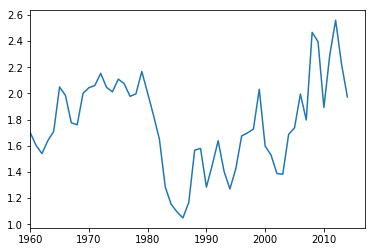

In [95]:
ts_ur = pd.Series(lines[1][4:-1], index=np.asarray(header_cols[4:-1], dtype=int))
ts_ur = pd.to_numeric(ts_ur)
ts_ur.plot()

# `DataFrame`

Since `Series` are one-dimensional arrays, we have to create a `DataFrame` if we wanted to combine our two previous `Series` objects `ts_dk` and `ts_ur`.Since `Series` are one-dimensional arrays, we have to create a `DataFrame` if we wanted to combine our two previous `Series` objects `ts_dk` and `ts_ur`. 

A `DataFrame` is a 2-dimensional labeled data structure with columns of potentially different types. You can think of it like a spreadsheet or SQL table, or a dict of Series objects.

In the following we concatenate two `Series`to form a `DataFrame`.

1960     6.502683
1961     6.881260
1962     7.945107
1963     8.689831
1964     9.146393
1965     9.316576
1966    10.449012
1967    10.149301
1968    10.961315
1969    12.142975
1970    12.599656
1971    11.497227
1972    11.948835
1973    11.801612
1974    10.916769
1975    11.023766
1976    11.854903
1977    12.154585
1978    11.973926
1979    12.312197
1980    11.784014
1981    10.111942
1982    10.491965
1983     9.810842
1984     9.950133
1985    11.747443
1986    11.503297
1987    11.379305
1988    10.743251
1989     9.505090
1990     9.770699
1991    11.693311
1992    10.504554
1993    10.998255
1994    11.716949
1995    10.924541
1996    13.714652
1997    11.647689
1998    11.227304
1999    10.362664
2000     9.613176
2001     9.875092
2002     9.681932
2003    10.388273
2004     9.362701
2005     8.690077
2006    10.112914
2007     9.202015
2008     8.543351
2009     8.058896
2010     8.407217
2011     7.296383
2012     6.514801
2013     6.862565
2014     5.935712
2015      

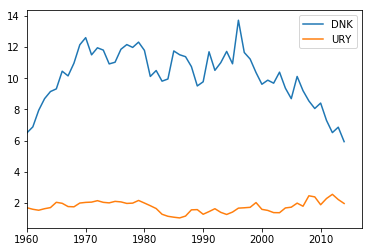

In [100]:
ts = pd.concat([ts_dk, ts_ur], axis=1, keys=['DNK', 'URY'])
ts
#print(type(ts))
ts.plot()
ts.DNK
ts['DNK']

More information on `DataFrame`s can be found here:
http://pandas.pydata.org/pandas-docs/stable/dsintro.html#dataframe

Similar to, we can create `DataFrame`s by giving the data for the values and indexes explicitely.

In [101]:
dates = pd.date_range('20180302', periods=6)
df = pd.DataFrame(np.random.randn(6,4), index=dates, 
                  columns=list('ABCD'))
df

,A,B,C,D
2018-03-02,-0.612599,-0.136859,0.318121,0.302881
2018-03-03,0.987664,-0.421156,0.444365,-0.777636
2018-03-04,0.049602,-0.112619,-0.168001,-0.088875
2018-03-05,0.259513,0.571963,0.328645,0.616206
2018-03-06,1.421140,-0.103240,0.042651,0.395065
2018-03-07,0.756476,0.081619,-0.087907,-0.164990


But since we do not want to work on random example data. We will have a look on the military expenditures of some countries in the world. We will use this data to exemplify usage of Pandas' `DataFrame` methods.

Again, we will receive the data from the World Bank.
http://data.worldbank.org/indicator/MS.MIL.XPND.CN?locations=DK-CN-US-RU

In [102]:
import requests


url = 'http://api.worldbank.org/v2/en/indicator/MS.MIL.XPND.CN'

response = requests.get(url, params={'downloadformat': 'csv'})
fname = response.headers['Content-Disposition'].split('=')[1]

if response.ok:  # status_code == 200:
    with open(fname, 'wb') as f:
        f.write(response.content)   

print('Downloaded {}'.format(fname))

Downloaded API_MS.MIL.XPND.CN_DS2_en_csv_v2.zip


In [103]:
import os
import zipfile


zipfile.ZipFile(fname, 'r').extractall('.')
os.remove(fname)

In [104]:
%%bash
ls -ltr | tail

-rw-r--r--  1 rhp  staff    220706 Feb 28 15:32 16-Intro to Numpy.ipynb
-rw-r--r--  1 rhp  staff    654563 Mar  2 09:50 API_Download_DS2_en_csv_v2_5623297.zip
-rw-r--r--  1 rhp  staff    937802 Mar  2 09:54 Metadata_Indicator_API_Download_DS2_en_csv_v2_5623297.csv
-rw-r--r--  1 rhp  staff       192 Mar  2 09:54 Metadata_Country_API_Download_DS2_en_csv_v2_5623297.csv
-rw-r--r--  1 rhp  staff   1706921 Mar  2 09:54 API_Download_DS2_en_csv_v2_5623297.csv
-rw-r--r--  1 rhp  staff     22663 Mar  2 10:08 Untitled5.ipynb
-rw-r--r--  1 rhp  staff    112625 Mar  2 10:16 17-Intro to Pandas.ipynb
-rw-r--r--  1 rhp  staff      1648 Mar  2 10:36 Metadata_Indicator_API_MS.MIL.XPND.CN_DS2_en_csv_v2.csv
-rw-r--r--  1 rhp  staff     39371 Mar  2 10:36 Metadata_Country_API_MS.MIL.XPND.CN_DS2_en_csv_v2.csv
-rw-r--r--  1 rhp  staff    134795 Mar  2 10:36 API_MS.MIL.XPND.CN_DS2_en_csv_v2.csv


In [106]:
from glob import glob


milit_files = glob('./*MIL*.csv')
expenditure_csv = milit_files[0]
expenditure_csv

'./API_MS.MIL.XPND.CN_DS2_en_csv_v2.csv'

In [107]:
%%bash
head ./API_MS.MIL.XPND.CN_DS2_en_csv_v2.csv

﻿"Data Source","World Development Indicators",

"Last Updated Date","2018-03-01",

"Country Name","Country Code","Indicator Name","Indicator Code","1960","1961","1962","1963","1964","1965","1966","1967","1968","1969","1970","1971","1972","1973","1974","1975","1976","1977","1978","1979","1980","1981","1982","1983","1984","1985","1986","1987","1988","1989","1990","1991","1992","1993","1994","1995","1996","1997","1998","1999","2000","2001","2002","2003","2004","2005","2006","2007","2008","2009","2010","2011","2012","2013","2014","2015","2016","2017",
"Aruba","ABW","Military expenditure (current LCU)","MS.MIL.XPND.CN","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","",
"Afghanistan","AFG","Military expenditure (current LCU)","MS.MIL.XPND.CN","","","","","","","","","","","1282500000","","","1457750000","1562500000","1834000000","2353000000","2673250000","","","","","",

Now, we use Pandas' `read_csv` function to read the downloaded CSV file directly. Note that we have to skip the first four rows as they do not contain data we are interested in, see keyword argument `skiprows=4`.

Reading the CSV file like this returns a `DataFrame` directly.

In [109]:
import pandas as pd


expenditures = pd.read_csv(expenditure_csv, skiprows=4)
expenditures

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,Unnamed: 62
0,Aruba,ABW,Military expenditure (current LCU),MS.MIL.XPND.CN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,AFG,Military expenditure (current LCU),MS.MIL.XPND.CN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.267533e+10,1.384967e+10,1.523050e+10,1.214900e+10,1.202767e+10,1.535600e+10,1.219917e+10,1.179150e+10,NaN,NaN
2,Angola,AGO,Military expenditure (current LCU),MS.MIL.XPND.CN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.626710e+11,3.217430e+11,3.418750e+11,3.956800e+11,5.878690e+11,6.730000e+11,4.332150e+11,4.622090e+11,NaN,NaN
3,Albania,ALB,Military expenditure (current LCU),MS.MIL.XPND.CN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.735600e+10,1.932100e+10,1.987700e+10,1.982000e+10,1.902200e+10,1.878800e+10,1.667100e+10,1.820600e+10,NaN,NaN
4,Andorra,AND,Military expenditure (current LCU),MS.MIL.XPND.CN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,Arab World,ARB,Military expenditure (current LCU),MS.MIL.XPND.CN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,United Arab Emirates,ARE,Military expenditure (current LCU),MS.MIL.XPND.CN,NaN,NaN,NaN,NaN,NaN,NaN,...,5.081400e+10,6.428600e+10,7.044500e+10,6.986600e+10,8.652800e+10,8.356800e+10,NaN,NaN,NaN,NaN
7,Argentina,ARG,Military expenditure (current LCU),MS.MIL.XPND.CN,1.550000e-03,2.140000e-03,2.660000e-03,3.360000e-03,3.450000e-03,4.280000e-03,...,1.106300e+10,1.354100e+10,1.665400e+10,2.070300e+10,2.805000e+10,4.020900e+10,5.062100e+10,7.691600e+10,NaN,NaN
8,Armenia,ARM,Military expenditure (current LCU),MS.MIL.XPND.CN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.306000e+11,1.476000e+11,1.456000e+11,1.529000e+11,1.821000e+11,1.904110e+11,2.138110e+11,2.072700e+11,NaN,NaN
9,American Samoa,ASM,Military expenditure (current LCU),MS.MIL.XPND.CN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Viewing Data

In [110]:
expenditures.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,Unnamed: 62
0,Aruba,ABW,Military expenditure (current LCU),MS.MIL.XPND.CN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,AFG,Military expenditure (current LCU),MS.MIL.XPND.CN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.267533e+10,1.384967e+10,1.523050e+10,1.214900e+10,1.202767e+10,1.535600e+10,1.219917e+10,1.179150e+10,NaN,NaN
2,Angola,AGO,Military expenditure (current LCU),MS.MIL.XPND.CN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.626710e+11,3.217430e+11,3.418750e+11,3.956800e+11,5.878690e+11,6.730000e+11,4.332150e+11,4.622090e+11,NaN,NaN
3,Albania,ALB,Military expenditure (current LCU),MS.MIL.XPND.CN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.735600e+10,1.932100e+10,1.987700e+10,1.982000e+10,1.902200e+10,1.878800e+10,1.667100e+10,1.820600e+10,NaN,NaN
4,Andorra,AND,Military expenditure (current LCU),MS.MIL.XPND.CN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [111]:
expenditures.tail()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,Unnamed: 62
259,Kosovo,XKX,Military expenditure (current LCU),MS.MIL.XPND.CN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.959923e+07,2.912822e+07,3.666471e+07,3.377049e+07,3.660178e+07,4.038172e+07,4.507072e+07,NaN,NaN,NaN
260,"Yemen, Rep.",YEM,Military expenditure (current LCU),MS.MIL.XPND.CN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.882000e+11,3.180000e+11,3.447000e+11,3.470000e+11,3.543000e+11,3.685000e+11,NaN,NaN,NaN,NaN
261,South Africa,ZAF,Military expenditure (current LCU),MS.MIL.XPND.CN,50000000.0,81250000.0,133000000.0,135000000.0,194000000.0,206750000.0,...,3.044325e+10,3.066250e+10,3.335875e+10,3.685940e+10,3.976155e+10,4.225475e+10,4.414880e+10,4.652212e+10,NaN,NaN
262,Zambia,ZMB,Military expenditure (current LCU),MS.MIL.XPND.CN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.115000e+09,1.344100e+09,1.502500e+09,1.782500e+09,2.057700e+09,2.729418e+09,3.215100e+09,3.088700e+09,NaN,NaN
263,Zimbabwe,ZWE,Military expenditure (current LCU),MS.MIL.XPND.CN,NaN,NaN,NaN,NaN,NaN,15600000.0,...,NaN,9.829300e+07,1.984380e+08,3.182720e+08,3.567000e+08,3.681000e+08,3.766770e+08,3.580650e+08,NaN,NaN


In [112]:
expenditures.index

RangeIndex(start=0, stop=264, step=1)

In [113]:
expenditures.columns

Index(['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code',
       '1960', '1961', '1962', '1963', '1964', '1965', '1966', '1967', '1968',
       '1969', '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977',
       '1978', '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986',
       '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995',
       '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004',
       '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013',
       '2014', '2015', '2016', '2017', 'Unnamed: 62'],
      dtype='object')

In [118]:
expenditures.values

array([['Aruba', 'ABW', 'Military expenditure (current LCU)', ..., nan,
        nan, nan],
       ['Afghanistan', 'AFG', 'Military expenditure (current LCU)', ...,
        11791500000.0, nan, nan],
       ['Angola', 'AGO', 'Military expenditure (current LCU)', ...,
        462209000000.0, nan, nan],
       ..., 
       ['South Africa', 'ZAF', 'Military expenditure (current LCU)', ...,
        46522125000.0, nan, nan],
       ['Zambia', 'ZMB', 'Military expenditure (current LCU)', ...,
        3088700000.0, nan, nan],
       ['Zimbabwe', 'ZWE', 'Military expenditure (current LCU)', ...,
        358065000.0, nan, nan]], dtype=object)

## Selection of Data in a `DataFrame`

### Selection by Column Name


In [ ]:
expenditures['Country Name']

### Selection by Indexes

In the following we index the third row directly.

In [ ]:
expenditures.iloc[3]

In [ ]:
expenditures.loc[3]

In [119]:
expenditures.iloc[3:5]

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,Unnamed: 62
3,Albania,ALB,Military expenditure (current LCU),MS.MIL.XPND.CN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.735600e+10,1.932100e+10,1.987700e+10,1.982000e+10,1.902200e+10,1.878800e+10,1.667100e+10,1.820600e+10,NaN,NaN
4,Andorra,AND,Military expenditure (current LCU),MS.MIL.XPND.CN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [120]:
expenditures.iloc[3:5, 4:-1]

,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.145000e+10,1.735600e+10,1.932100e+10,1.987700e+10,1.982000e+10,1.902200e+10,1.878800e+10,1.667100e+10,1.820600e+10,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Boolean Indexing

Similar to NumPy, you can use boolean arrays for indexing. That is, you can use boolean expressions directly for indexing.

In the following we assign `expenditures` to `df`as the latter is shorter.

In [121]:
df = expenditures

df[df['Country Name'] == 'Denmark']

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,Unnamed: 62
56,Denmark,DNK,Military expenditure (current LCU),MS.MIL.XPND.CN,1.113000e+09,1.180000e+09,1.551000e+09,1.651000e+09,1.764000e+09,1.974000e+09,...,2.325200e+10,2.532800e+10,2.425900e+10,2.561700e+10,2.368200e+10,2.276900e+10,2.263300e+10,2.365700e+10,NaN,NaN


Using the `isin()` method for filtering:

In [122]:
df[df['Country Name'].isin(['United States', 'China', 'Denmark', 'Russian Federation'])]

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,Unnamed: 62
38,China,CHN,Military expenditure (current LCU),MS.MIL.XPND.CN,NaN,NaN,NaN,NaN,NaN,NaN,...,7.217000e+11,7.834000e+11,8.914702e+11,9.935000e+11,1.114496e+12,1.233430e+12,1.333262e+12,1.430929e+12,NaN,NaN
56,Denmark,DNK,Military expenditure (current LCU),MS.MIL.XPND.CN,1.113000e+09,1.180000e+09,1.551000e+09,1.651000e+09,1.764000e+09,1.974000e+09,...,2.325200e+10,2.532800e+10,2.425900e+10,2.561700e+10,2.368200e+10,2.276900e+10,2.263300e+10,2.365700e+10,NaN,NaN
200,Russian Federation,RUS,Military expenditure (current LCU),MS.MIL.XPND.CN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.635650e+12,1.783210e+12,2.063740e+12,2.512500e+12,2.812900e+12,3.250500e+12,4.047400e+12,4.644800e+12,NaN,NaN
249,United States,USA,Military expenditure (current LCU),MS.MIL.XPND.CN,4.538000e+10,4.780800e+10,5.238100e+10,5.229500e+10,5.121300e+10,5.182700e+10,...,6.685670e+11,6.981800e+11,7.113380e+11,6.847800e+11,6.397040e+11,6.099140e+11,5.960096e+11,6.111864e+11,NaN,NaN


Here, we create a `DataFrame` of all country codes for the four countries, which we want to study further in the following.

In [123]:
c_code_df = df[df['Country Name'].isin(['United States', 'China', 
                                        'Denmark', 'Russian Federation'])]['Country Code']
c_code_df

38     CHN
56     DNK
200    RUS
249    USA
Name: Country Code, dtype: object

We cannot plot the time series of military expenditures directly in a meaningful way as we would like to have the years on the y-axis but in the selection of our `DataFrame`, the year numbers are column names. Consequently, we have to transpose our `DataFrame`, see `T` function.

Note, that the expenditures are given in `LUC` in the World Bank data set. That is, in currency of the corresponding country.

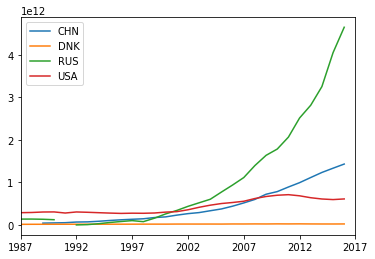

In [128]:
import matplotlib.pyplot as plt


ts_df = df.iloc[c_code_df.index, 31:-1].T
ts_df = ts_df.rename(columns=dict(c_code_df))
ts_df
ts_df.plot()

Since this plot may be a bit misleading, we will 'normalize' all expeditures to Euro, so that they are better comparible.

In [129]:
import requests


# http://www.ecb.europa.eu/stats/policy_and_exchange_rates/euro_reference_exchange_rates/html/index.en.html#dev
response = requests.get('http://www.ecb.europa.eu/stats/eurofxref/eurofxref-daily.xml')
response.text

'<?xml version="1.0" encoding="UTF-8"?>\n<gesmes:Envelope xmlns:gesmes="http://www.gesmes.org/xml/2002-08-01" xmlns="http://www.ecb.int/vocabulary/2002-08-01/eurofxref">\n\t<gesmes:subject>Reference rates</gesmes:subject>\n\t<gesmes:Sender>\n\t\t<gesmes:name>European Central Bank</gesmes:name>\n\t</gesmes:Sender>\n\t<Cube>\n\t\t<Cube time=\'2018-03-01\'>\n\t\t\t<Cube currency=\'USD\' rate=\'1.2171\'/>\n\t\t\t<Cube currency=\'JPY\' rate=\'129.98\'/>\n\t\t\t<Cube currency=\'BGN\' rate=\'1.9558\'/>\n\t\t\t<Cube currency=\'CZK\' rate=\'25.434\'/>\n\t\t\t<Cube currency=\'DKK\' rate=\'7.4470\'/>\n\t\t\t<Cube currency=\'GBP\' rate=\'0.88520\'/>\n\t\t\t<Cube currency=\'HUF\' rate=\'313.78\'/>\n\t\t\t<Cube currency=\'PLN\' rate=\'4.1853\'/>\n\t\t\t<Cube currency=\'RON\' rate=\'4.6573\'/>\n\t\t\t<Cube currency=\'SEK\' rate=\'10.1185\'/>\n\t\t\t<Cube currency=\'CHF\' rate=\'1.1519\'/>\n\t\t\t<Cube currency=\'ISK\' rate=\'123.70\'/>\n\t\t\t<Cube currency=\'NOK\' rate=\'9.6600\'/>\n\t\t\t<Cube curr

In [130]:
from bs4 import BeautifulSoup


xml = BeautifulSoup(response.text, 'html5lib')
rate_list = xml.cube.cube.findAll("cube") # [0]['rate']

currency = ['USD', 'DKK', 'RUB', 'CNY']
rate_dict = dict.fromkeys(currency)
for r in rate_list:
    if r['currency'] in currency:
        rate_dict[r['currency']] = float(r['rate'])
        print(r['rate'])
rate_dict

1.2171
7.4470
69.1788
7.7290


{'CNY': 7.729, 'DKK': 7.447, 'RUB': 69.1788, 'USD': 1.2171}

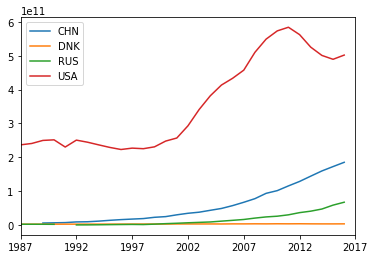

In [131]:
ts_df['DNK'] = ts_df['DNK'] / rate_dict['DKK']
ts_df['USA'] = ts_df['USA'] / rate_dict['USD']
ts_df['CHN'] = ts_df['CHN'] / rate_dict['CNY']
ts_df['RUS'] = ts_df['RUS'] / rate_dict['RUB']
ts_df.plot()

**OBS!!!** Be careful, the graph above is still not really well suited for comparison as currency exchange rates are not fix. However, the code above normalizes just relying on the most current exchange rate from the European Central Bank. See the exercise block in the bottom for how to fix that isuue!

# Exercises for the Interested

  * Complete the comparison of military expenditures by converting all currencies to USD. Since we have yearly expenditures, use for example the yearly median for normalization. Likely, you will find an API to collect historical echange rates at Yahoo Finance.
  
  https://developer.yahoo.com/yql/console/?q=show%20tables&env=store://datatables.org/alltableswithkeys#h=select+*+from+yahoo.finance.historicaldata+where+symbol+%3D+%22RUB%3DX%22+and+startDate+%3D+%222010-01-01%22+and+endDate+%3D+%222011-01-01%22

## PS

In case you have to sort the data in your `DataFrames` see the methods `sort_index` and `sort_values`.


```python
df.sort_index(axis=1, ascending=True)
df.sort_values(by='Country Code')
```

In [ ]:
df.sort_index?

In [ ]:
df.sort_values?